In [13]:
import pandas as pd
import numpy as np
import json
import peakutils
import matplotlib.pyplot as plt

In [14]:
def load_json(file):
    '''
    Loads txt file and returns json dict
    '''
    data = {}
    with open(file, encoding='utf-8') as f:
        for line in f:
            d = str(line).replace("'", '"')
            data = json.loads(d)
    
    return data

In [39]:
data[0]['seq'][0]

{'data': {'xAccl': -41,
  'xGyro': -46,
  'xMag': -449,
  'yAccl': 32,
  'yGyro': 39,
  'yMag': 176,
  'zAccl': 1349,
  'zGyro': -21,
  'zMag': 281},
 'time': 1515075567.745726}

In [44]:
# obtain accelerometer data from each axis
x_accl = []
y_accl = []
z_accl = []
for trace in data:
    for seq in trace['seq']:
        
        x_accl.append(seq['data']['xAccl'])
        y_accl.append(seq['data']['yAccl'])
        z_accl.append(seq['data']['zAccl'])

In [45]:
x_accl

[-41,
 -39,
 -54,
 -51,
 -51,
 -37,
 -54,
 -35,
 -41,
 -41,
 -49,
 -37,
 -38,
 -38,
 -32,
 -31,
 -45,
 -45,
 -48,
 -51,
 -54,
 -36,
 -36,
 -54,
 -52,
 -49,
 -49,
 -28,
 -45,
 -43,
 -43,
 -44,
 -29,
 -46,
 -43,
 -43,
 -53,
 -31,
 -35,
 -35,
 -39,
 -41,
 -48,
 -45,
 -45,
 -49,
 -42,
 -50,
 -50,
 -39,
 -35,
 -39,
 -39,
 -28,
 -42,
 -54,
 -49,
 -49,
 -36,
 -41,
 -42,
 -48,
 -48,
 -52,
 -29,
 -49,
 -49,
 -44,
 -57,
 -38,
 -38,
 -46,
 -32,
 -55,
 -55,
 -40,
 -56,
 -37,
 -152,
 -304,
 -607,
 -386,
 -386,
 -281,
 -452,
 -535,
 -535,
 -478,
 -427,
 -309,
 -222,
 -222,
 -250,
 -260,
 -147,
 -147,
 -352,
 -172,
 -159,
 -159,
 -79,
 -167,
 -198,
 -50,
 -50,
 -140,
 -214,
 43,
 -213,
 -179,
 -163,
 -63,
 -62,
 -62,
 -31,
 -122,
 -94,
 -94,
 -99,
 -86,
 -103,
 -103,
 -95,
 -28,
 -140,
 -127,
 -127,
 -89,
 167,
 35,
 -54,
 8,
 12,
 -91,
 -91,
 -167,
 -5,
 54,
 54,
 160,
 -76,
 46,
 46,
 -44,
 -95,
 -75,
 -2,
 -2,
 -116,
 -79,
 -80,
 -118,
 -118,
 7,
 -130,
 -31,
 -31,
 33,
 -70,
 -26,
 -134,
 -134,
 

In [19]:
def process_sequence(file):
    '''
    Loads data and creates dictionary of calculations from accelerometer data
    '''
    data = load_json(file)
    
    # obtain actitivy from trace
    activity = data[0]['type']
    
    # obtain accelerometer data from each axis
    x_accl = []
    y_accl = []
    z_accl = []
    for x in data:
        for seq in data[x]['seq']:
            for y in seq:
                x_accl.append(seq[y]['data']['xAccl'])
                y_accl.append(seq[y]['data']['yAccl'])
                z_accl.append(seq[y]['data']['zAccl'])
    
    # obtain gyroscope data from each axis
    x_gyro = []
    y_gyro = []
    z_gyro = []
    for x in data:
        for seq in data[x]['seq']:
            x_gyro.append(seq['data']['xGyro'])
            y_gyro.append(seq['data']['yGyro'])
            z_gyro.append(seq['data']['zGyro'])

    # obtain mag sensor data from each axis
    x_mag = []
    y_mag = []
    z_mag = []
    for x in data:
        for seq in data[x]['seq']:
            x_mag.append(seq['data']['xMag'])
            y_mag.append(seq['data']['yMag'])
            z_mag.append(seq['data']['zMag'])    
        
    # calculate means for data sequence
    x_accl_mean = np.mean(x_accl)
    y_accl_mean = np.mean(y_accl)
    z_accl_mean = np.mean(z_accl)
    x_gyro_mean = np.mean(x_gyro)
    y_gyro_mean = np.mean(y_gyro)
    z_gyro_mean = np.mean(z_gyro)
    x_mag_mean = np.mean(x_mag)
    y_mag_mean = np.mean(y_mag)
    z_mag_mean = np.mean(z_mag)
    
    # calculate standard deviations for sequence
    x_accl_sd = np.std(x_accl)
    y_accl_sd = np.std(y_accl)
    z_accl_sd = np.std(z_accl)
    x_gyro_sd = np.std(x_gyro)
    y_gyro_sd = np.std(y_gyro)
    z_gyro_sd = np.std(z_gyro)
    x_mag_sd = np.std(x_mag)
    y_mag_sd = np.std(y_mag)
    z_mag_sd = np.std(z_mag)
    
    # calculate number of peaks for sequence
    x_accl_peaks = len(peakutils.indexes(x_accl, thres=0.02/max(x_accl), min_dist=0.1))
    y_accl_peaks = len(peakutils.indexes(y_accl, thres=0.02/max(y_accl), min_dist=0.1))
    z_accl_peaks = len(peakutils.indexes(z_accl, thres=0.02/max(z_accl), min_dist=0.1))
    x_gyro_peaks = len(peakutils.indexes(x_gyro, thres=0.02/max(x_gyro), min_dist=0.1))
    y_gyro_peaks = len(peakutils.indexes(y_gyro, thres=0.02/max(y_gyro), min_dist=0.1))
    z_gyro_peaks = len(peakutils.indexes(z_gyro, thres=0.02/max(z_gyro), min_dist=0.1))
    x_mag_peaks = len(peakutils.indexes(x_mag, thres=0.02/max(x_mag), min_dist=0.1))
    y_mag_peaks = len(peakutils.indexes(y_mag, thres=0.02/max(y_mag), min_dist=0.1))
    z_mag_peaks = len(peakutils.indexes(z_mag, thres=0.02/max(z_mag), min_dist=0.1))
    
    # store processed data in dictionary
    clean_data = {'activity': activity,
                  'x_accl_mean': x_accl_mean, 'x_accl_sd': x_accl_sd, 'x_accl_peaks': x_accl_peaks,
                  'y_accl_mean': y_accl_mean, 'y_accl_sd': y_accl_sd, 'y_accl_peaks': y_accl_peaks,
                  'z_accl_mean': z_accl_mean, 'z_accl_sd': z_accl_sd, 'z_accl_peaks': z_accl_peaks,
                  'x_gyro_mean': x_gyro_mean, 'x_gyro_sd': x_gyro_sd, 'x_gyro_peaks': x_gyro_peaks,
                  'y_gyro_mean': y_gyro_mean, 'y_gyro_sd': y_gyro_sd, 'y_gyro_peaks': y_gyro_peaks,
                  'z_gyro_mean': z_gyro_mean, 'z_gyro_sd': z_gyro_sd, 'z_gyro_peaks': z_gyro_peaks, 
                  'x_mag_mean': x_mag_mean, 'x_mag_sd': x_mag_sd, 'x_mag_peaks': x_mag_peaks, 
                  'y_mag_mean': y_mag_mean, 'y_mag_sd': y_mag_sd, 'y_mag_peaks': y_mag_peaks,
                  'z_mag_mean': z_mag_mean, 'z_mag_sd': z_mag_sd, 'z_mag_peaks': z_mag_peaks}
    
    cols = ['activity', 'x_accl_mean', 'x_accl_sd', 'x_accl_peaks',
            'y_accl_mean', 'y_accl_sd', 'y_accl_peaks',
            'z_accl_mean', 'z_accl_sd', 'z_accl_peaks',
            'x_gyro_mean', 'x_gyro_sd', 'x_gyro_peaks',
            'y_gyro_mean', 'y_gyro_sd', 'y_gyro_peaks',
            'z_gyro_mean', 'z_gyro_sd', 'z_gyro_peaks', 
            'x_mag_mean', 'x_mag_sd', 'x_mag_peaks', 
            'y_mag_mean', 'y_mag_sd', 'y_mag_peaks',
            'z_mag_mean', 'z_mag_sd', 'z_mag_peaks']
    data_list = [activity, x_accl_mean, x_accl_sd, x_accl_peaks,
                y_accl_mean, y_accl_sd, y_accl_peaks,
                z_accl_mean, z_accl_sd, z_accl_peaks,
                x_gyro_mean, x_gyro_sd, x_gyro_peaks,
                y_gyro_mean, y_gyro_sd, y_gyro_peaks,
                z_gyro_mean, z_gyro_sd, z_gyro_peaks, 
                x_mag_mean, x_mag_sd, x_mag_peaks, 
                y_mag_mean, y_mag_sd, y_mag_peaks,
                z_mag_mean, z_mag_sd, z_mag_peaks] 
    
    df = pd.DataFrame(clean_data, index=[0])
    return ((x_accl, y_accl, z_accl), df)

In [16]:
def plot_traces(plots, activity):
    x,y,z = plots
    plt.figure(figsize=(15,5))
    plt.plot(x, label='x')
    plt.plot(y, label='y')
    plt.plot(z, label='z')
    plt.legend()
    plt.title(activity)
    plt.savefig(activity + '.png')
    plt.show()

In [20]:
master = []

for i in ['driving','standing','walking','jumping']:
#     for j in ['0','1']:
#         dataset = i + j
        plots, df = process_sequence('class-data/' + i + '.txt')
        # plot_traces(plots, dataset)
        master += [df]

master = pd.concat(master)
master['activity_factor'] = pd.factorize(master['activity'])[0]
master

TypeError: list indices must be integers or slices, not dict

In [6]:
train = master # .iloc[::2, :]
test = master.iloc[1::2, :]

In [7]:
y_train = train['activity_factor']
x_train = train.drop(['activity_factor', 'activity'], axis=1)

In [8]:
y_test = test['activity_factor']
x_test = test.drop(['activity_factor', 'activity'], axis=1)

In [15]:
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import validation_curve
import seaborn as sns

In [10]:
C_params = np.logspace(-6, 3, 10)
svc_2 = LinearSVC(random_state = 12)

train_scores, test_scores = validation_curve(
    svc_2, x_train.values, y_train.values.flatten(),
    param_name="C", param_range=C_params,
    cv=2, scoring="accuracy", n_jobs=-1)

In [11]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

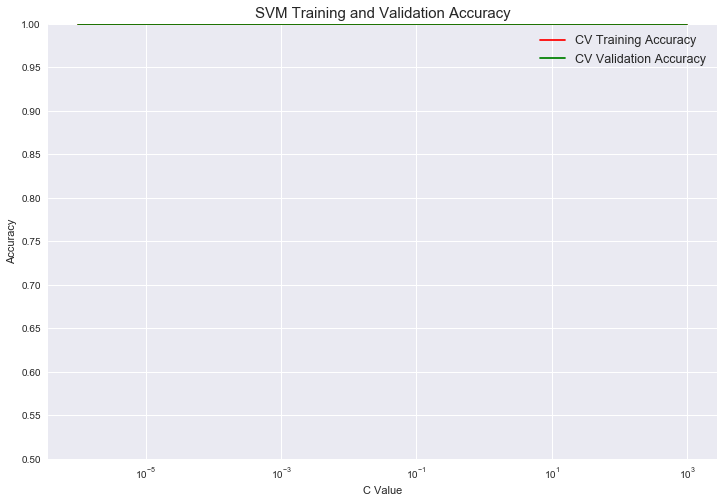

In [12]:
y_min = 0.5
y_max = 1.0

f = plt.figure(figsize = (12, 8))
ax = plt.axes()
sns.set(font_scale = 1.25)
sns.set_style("darkgrid")
plt.title("SVM Training and Validation Accuracy")
plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.ylim(y_min, y_max)
plt.yticks(np.arange(y_min, y_max + .01, .05))
plt.semilogx(C_params, train_scores_mean, label="CV Training Accuracy", color="red")
plt.fill_between(C_params, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="red")
plt.semilogx(C_params, test_scores_mean, label="CV Validation Accuracy",
             color="green")
plt.fill_between(C_params, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="green")
plt.legend(loc="best")
plt.show()

In [13]:
from sklearn.svm import SVC

Cs = np.logspace(-6, 3, 10)
parameters = [{'kernel': ['rbf'], 'C': Cs},
              {'kernel': ['linear'], 'C': Cs}]

svc = SVC(random_state = 12)

clf = GridSearchCV(estimator = svc, param_grid = parameters, cv = 2, n_jobs = -1)
clf.fit(x_train.values, y_train.values)

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': array([  1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03])}, {'kernel': ['linear'], 'C': array([  1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03])}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [14]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

SVC(C=9.9999999999999995e-07, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False)
{'kernel': 'linear', 'C': 9.9999999999999995e-07}
1.0
